# Домашнее задание 2-3

In [60]:
import numpy as np
import matplotlib.pyplot as plt

## Задание 3

In [61]:
def sek(x0, x1, f, eps):
    x_prev = x0
    x_curr = x1
    x_next = x0
    for i in range(10**6):
        x_next = x_prev - (f(x_prev) * (x1 - x0))/(f(x_curr) - f(x_prev))
        if np.abs(x_next - x_curr) <= eps:
            break
        else:
            x_prev, x_curr = x_curr, x_next
    return x_next

def newton(x0, f, fprime, eps):
    x_prev = x0
    for i in range(10**6):
        x_curr = x_prev - f(x_prev)/fprime(x_prev)
        if (np.abs(x_curr - x_prev) < eps):
            break
        else:
            x_prev = x_curr
    return x_curr



In [62]:
def f1(x):
    return (x-3) * np.cos(x) - 1

def f1_prime(x):
    return np.cos(x) - (x-3) * np.sin(x)

def f2(x):
    return 2 * np.log(x) - x/2 + 1

def f2_prime(x):
    return 2 / x - 1/2

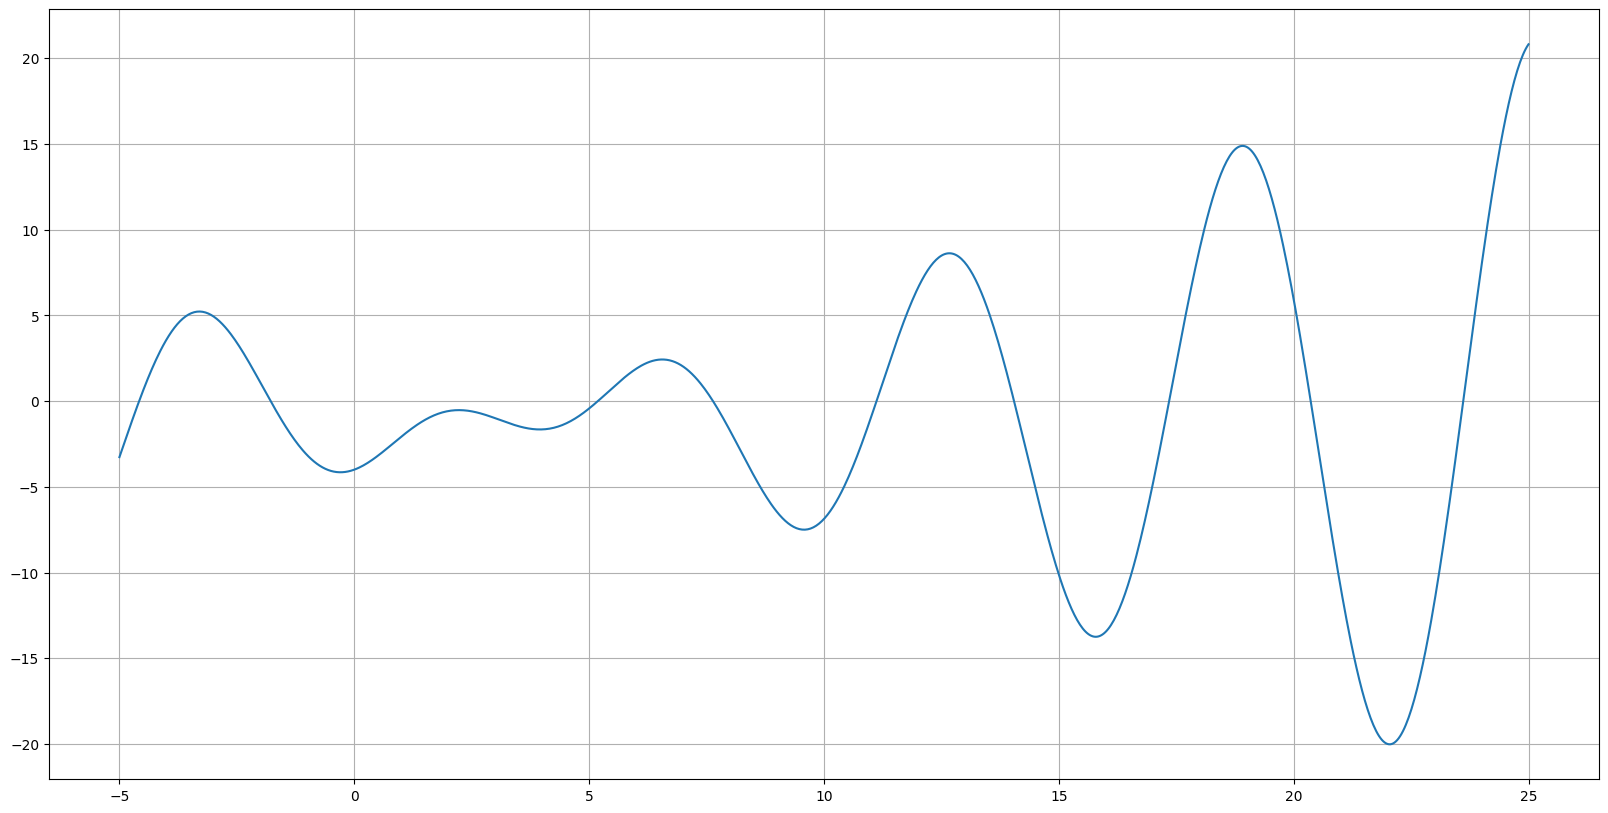

In [63]:
plt.figure(figsize=(20, 10))
plt.plot(np.linspace(-5, 25, 1000), f1(np.linspace(-5, 25, 1000)))
plt.grid()
plt.show()

In [64]:
print(sek(0, -0.1, f1, 1e-3))
print(newton(0, f1, f1_prime, 1e-3))

-4.581557755612799
20.36272571564238


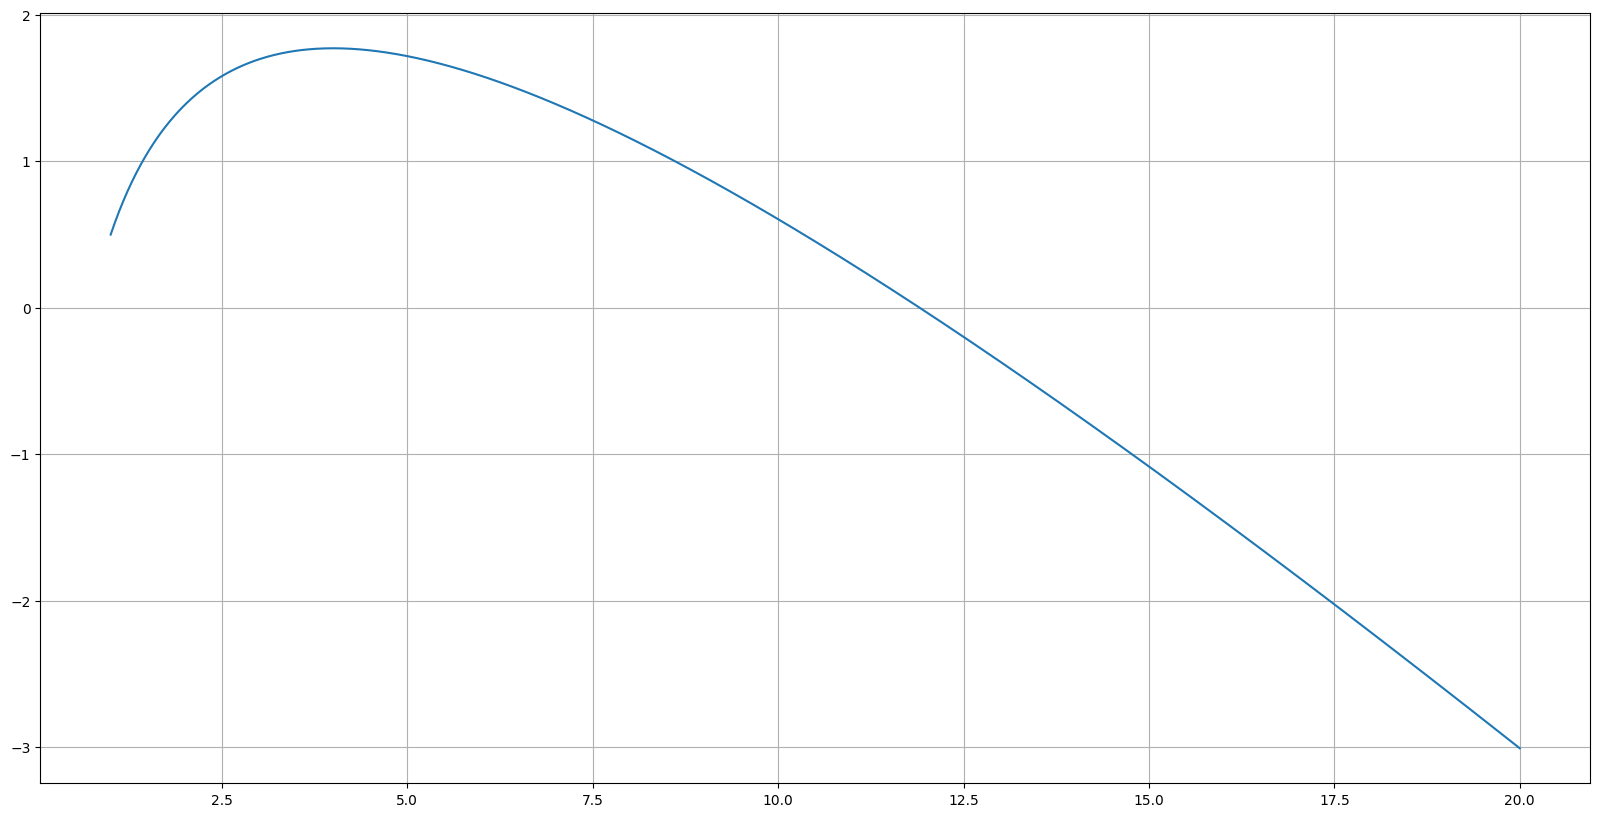

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(np.linspace(1, 20, 1000), f2(np.linspace(1, 20, 1000)))
plt.grid()
plt.show()

In [66]:
print(sek(6, 6.1, f2, 1e-3))
print(newton(6, f2, f2_prime, 1e-3))

11.903264686066715
11.909267529227773


## Задание 5

In [67]:
def F1(x):
    return np.array([np.sin(x[0]+1) - x[1] - 1.2 , 2*x[0] + np.cos(x[1]) - 2])

def F2(x):
    return np.array([np.cos(x[0]-1) + x[1] -0.5 , x[0] - np.cos(x[1]) - 3])

In [68]:
# Не хотим вычислять матрицу Якоби ручками - символьные вычисления спешат на помощь
import sympy as smp

# Определение переменных
x1, x2 = smp.symbols('x1 x2')

# Определение уравнений
eq1 = smp.cos(x1-1) + x2 -0.5
eq2 = x1 - smp.cos(x2) - 3

# Создание списка уравнений
equations = [eq1, eq2]

# Нахождение Якобиана
J_2 = smp.Matrix([[smp.diff(eq, var) for var in (x1, x2)] for eq in equations])

# Вывод уравнений и матрицы Якоби
print("Система уравнений:")
for eq in equations:
    display(eq)

print("\nМатрица Якоби:")
display(J_2)
J_2 = smp.lambdify([x1, x2], J_2, 'numpy')

Система уравнений:


x2 + cos(x1 - 1) - 0.5

x1 - cos(x2) - 3


Матрица Якоби:


Matrix([
[-sin(x1 - 1),       1],
[           1, sin(x2)]])

In [69]:
# Определение переменных
x1, x2 = smp.symbols('x1 x2')

# Определение уравнений
eq1 = smp.sin(x1 + 1) - x2 - 1.2
eq2 = 2*x1 + smp.cos(x2) - 2

# Создание списка уравнений
equations = [eq1, eq2]

# Нахождение Якобиана
J_1 = smp.Matrix([[smp.diff(eq, var) for var in (x1, x2)] for eq in equations])

# Вывод уравнений и матрицы Якоби
print("Система уравнений:")
for eq in equations:
    display(eq)

print("\nМатрица Якоби:")
display(J_1)
J_1 = smp.lambdify([x1, x2], J_1, 'numpy')

Система уравнений:


-x2 + sin(x1 + 1) - 1.2

2*x1 + cos(x2) - 2


Матрица Якоби:


Matrix([
[cos(x1 + 1),       -1],
[          2, -sin(x2)]])

In [70]:
def Newton_system(F, J, x, eps):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(*x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [71]:
def g1(x):
    return np.sin(x+1) + np.arccos(2 - 2*x) - 1.2

def g1_prime(x):
    return np.cos(x+1) + 2/np.sqrt(-4 * x**2 + 8 * x - 3)

def g2(x):
    return np.cos(x-1) + np.arccos(x - 3) - 0.5

def g2_prime(x):
    return -1 * np.sin(x-1) -1/np.sqrt(1 - (x - 3)**2)

In [72]:
x, n = Newton_system(F1, J_1, x=np.array([2., -1.]), eps=1e-4)
print(x, n)

[ 0.51015014 -0.20183829] 5


In [77]:
x1_min = newton(0.51, g1, g1_prime, 1e-3)
y1_min = -1*np.arccos(2 - 2*x1_min)

print(x1_min, y1_min)

0.5101496058429703 -0.20183291215822513


In [74]:
x, n = Newton_system(F2, J_2, x=np.array([2., -1.]), eps=1e-4)
print(x, n)

[3.35591182 1.2069069 ] 6


In [75]:
x2_min = newton(3, g2, g2_prime, 1e-4)
y2_min = np.arccos(x2_min - 3)

print(x2_min, y2_min)

3.35591173881433 1.2069068175305393
